<a href="https://colab.research.google.com/github/anaguilarar/gee_NOAA/blob/master/Descargar%20clima%20de%20GEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/anaguilarar/gee_NOAA.git

Cloning into 'gee_NOAA'...
remote: Enumerating objects: 142, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 142 (delta 66), reused 110 (delta 39), pack-reused 0
Receiving objects: 100% (142/142), 1.14 MiB | 3.15 MiB/s, done.
Resolving deltas: 100% (66/66), done.


In [2]:
import os
os.chdir('gee_NOAA')

In [3]:
import ee
ee.Authenticate()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=3cwC9sT_bfQV7w2xmboEQmrqEhDi6KSigPZF-NqEH5g&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g4sQi8KmjoUamvXhtlHb5j-yxmjUNzcs_uRB9mXMXsf5NqlQe8dXHs

Successfully saved authorization token.


In [4]:
import get_geedata
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Consulta de datos
### Inputs del código
 
 * Archivo csv con las coordendas, dichos datos deben estar en WGS84 (longitud | latitud).
 * Periodo en el cual se realizará la descarga.
 

### Extraer datos CFS y resumirlos a nivel diario

In [5]:
## conusltar las imageens disponibles en google earth engine para la misión en específico
datainit = get_geedata.gee_weatherdata("2019-01-01",
                                       "2020-05-30", 
                                       "data/truestationlocation.csv", mission = "cfs")
datainit.features

,longitude,latitude,index
0,-78.62869,-5.65875,1
1,-78.69203,-5.64777,2


Señalar que bandas serán resumidas por promedio, sumatario, mínimio o máximo.
Para mayor información consultar las bandas en: https://developers.google.com/earth-engine/datasets/catalog/NOAA_CFSV2_FOR6H 

In [6]:

avgbands =  ['Specific_humidity_height_above_ground', 
             'Pressure_surface']

sumbands = ['Downward_Short-Wave_Radiation_Flux_surface_6_Hour_Average',
            'Upward_Short-Wave_Radiation_Flux_surface_6_Hour_Average',
            'Precipitation_rate_surface_6_Hour_Average',
            'Potential_Evaporation_Rate_surface_6_Hour_Average']

minbands = ['Minimum_temperature_height_above_ground_6_Hour_Interval']
maxbands = ['Maximum_temperature_height_above_ground_6_Hour_Interval']


In [7]:
## extracción de los datos

noaadata= datainit.summarise_hourlydata(average_bands=avgbands,
                       cummulative_bands=sumbands,
                       minimum_bands = minbands,
                       maximum_bands = maxbands)

/content/gee_NOAA/get_geedata.py:437: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  def_variables = np.array(list_var)[var_filter]


mean features processed
sum features processed
min features processed
max features processed


In [8]:
noaadata.head()

,Specific_humidity_height_above_ground,Pressure_surface,Downward_Short-Wave_Radiation_Flux_surface_6_Hour_Average,Upward_Short-Wave_Radiation_Flux_surface_6_Hour_Average,Precipitation_rate_surface_6_Hour_Average,Potential_Evaporation_Rate_surface_6_Hour_Average,Minimum_temperature_height_above_ground_6_Hour_Interval,Maximum_temperature_height_above_ground_6_Hour_Interval,date,longitude,latitude
0,0.010513,91075.0,592.0,104.0,0.000145,768.0,286.899994,298.700012,2019-01-01,-78.62869,-5.65875
1,0.010513,91075.0,592.0,104.0,0.000145,768.0,286.899994,298.700012,2019-01-01,-78.69203,-5.64777
2,0.010254,91117.5,545.0,96.0,0.000089,836.0,286.799988,298.399994,2019-01-02,-78.62869,-5.65875
3,0.010254,91117.5,545.0,96.0,0.000089,836.0,286.799988,298.399994,2019-01-02,-78.69203,-5.64777
4,0.010284,91060.0,1131.0,190.0,0.000041,1308.0,286.799988,303.399994,2019-01-03,-78.62869,-5.65875


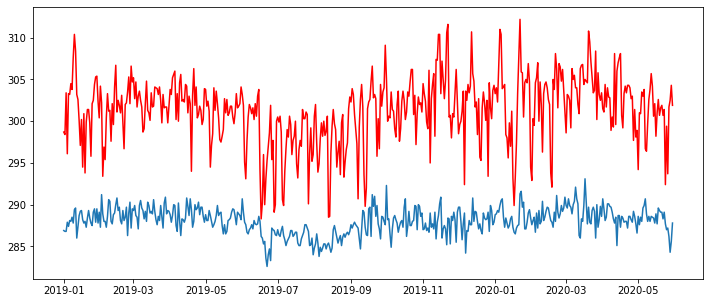

In [9]:
### gráficar resultados

ref_long = datainit.features.longitude.loc[0]

plotdata = noaadata[np.round(noaadata.longitude, 3) == np.round(ref_long, 3)]

plt.figure(figsize=[12,5])
plt.plot(plotdata.date, plotdata['Minimum_temperature_height_above_ground_6_Hour_Interval'].values)
plt.plot(plotdata.date, plotdata['Maximum_temperature_height_above_ground_6_Hour_Interval'].values, color = 'red')
plt.show()


In [ ]:
### exportar datos
noaadata.to_csv(os.path.join("noaa_data.csv"))

## Extraer datos CHIRPS

In [15]:
## conusltar las imageens disponibles en google earth engine para la misión en específico
datachirps = get_geedata.gee_weatherdata("2019-01-01",
                                         "2020-05-30", 
                                         "data/truestationlocation.csv",
                                         "chirps" )

datachirps.features

,longitude,latitude,index
0,-78.62869,-5.65875,1
1,-78.69203,-5.64777,2


In [16]:
## resumir los datos en una tabla
dfchirps = datachirps.CHIRPSdata_asdf()
dfchirps.head()

,precipitation,date,longitude,latitude
0,0.0,2019-01-01,-78.62869,-5.65875
1,0.0,2019-01-01,-78.69203,-5.64777
2,0.0,2019-01-02,-78.62869,-5.65875
3,0.0,2019-01-02,-78.69203,-5.64777
4,0.0,2019-01-03,-78.62869,-5.65875


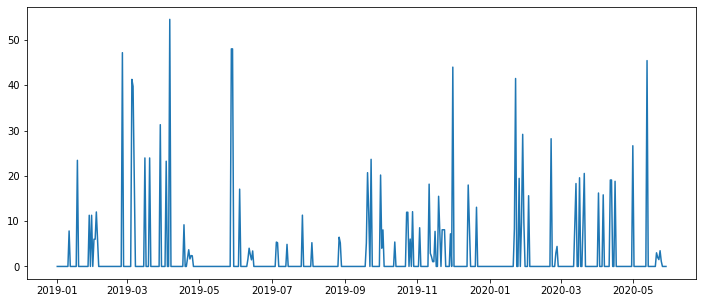

In [17]:
### gráficar resultados

ref_long = datachirps.features.longitude.loc[0]

plotdata = dfchirps[np.round(dfchirps.longitude, 3) == np.round(ref_long, 3)]

plt.figure(figsize=[12,5])
plt.plot(plotdata.date, plotdata['precipitation'].values)

plt.show()

In [13]:
### exportar datos
dfchirps.to_csv("chirpsdata.csv")

## Extraer datos GLDAS y resumirlos a nivel diario

In [18]:
## conusltar las imageens disponibles en google earth engine para la misión en específico
datainit = get_geedata.gee_weatherdata("2019-01-01",
                                       "2020-05-30", 
                                       "data/truestationlocation.csv", 
                                       mission = "gldas")
datainit.features

,longitude,latitude,index
0,-78.62869,-5.65875,1
1,-78.69203,-5.64777,2


Señalar que bandas serán resumidas por promedio, sumatario, mínimio o máximo.
Para mayor información consultar las bandas en: https://developers.google.com/earth-engine/datasets/catalog/NASA_GLDAS_V021_NOAH_G025_T3H

In [19]:
avgbands =  ['AvgSurfT_inst',
            'SWdown_f_tavg']

sumbands = ['Evap_tavg', 
            'Rainf_f_tavg']

minbands = ['AvgSurfT_inst']
maxbands = ['AvgSurfT_inst']

In [21]:
## extracción de los datos

gldasdata= datainit.summarise_hourlydata(average_bands=avgbands,
                                        cummulative_bands=sumbands,
                                        minimum_bands = minbands,
                                        maximum_bands = maxbands)

/content/gee_NOAA/get_geedata.py:437: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  def_variables = np.array(list_var)[var_filter]


mean features processed
sum features processed
min features processed
max features processed


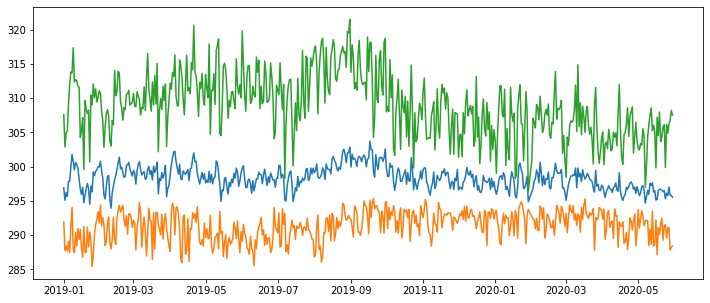

In [23]:
### gráficar resultados


ref_long = datainit.features.longitude.loc[0]

plotdata = gldasdata[np.round(gldasdata.longitude.values.astype(np.float), 1) == np.round(ref_long.astype(np.float), 1)]


plt.figure(figsize=[12,5])
plt.plot(plotdata.date, plotdata['AvgSurfT_inst'].values)
plt.show()

In [24]:
### exportar datos
gldasdata.to_csv("gldasdata_example.csv")

## Extraer datos DAYMET nivel diario

In [ ]:
## conusltar las imageens disponibles en google earth engine para la misión en específico
datainit = get_geedata.gee_weatherdata("2015-01-01","2015-12-31", 
                                       "data/daymet_example.csv", 
                                       mission = "daymet")
datainit.features

,longitude,latitude,index
0,-92.887991,16.318583,1
1,-92.887991,16.318583,2
2,-93.143861,16.641305,3
3,-93.143861,16.641305,4
4,-92.744805,16.466055,5
...,...,...,...
1759,-92.058786,15.717155,1760
1760,-92.058786,15.717155,1761
1761,-92.034235,15.846933,1762
1762,-92.456999,16.344538,1763


In [ ]:
dfdaymet = datainit.DAYMETdata_asdf()

dfdaymet.head()

an exception was genereted, query aborted after accumulating over 5000 elements, running by 13 features
Calculating which features share similar data
907 pixels wrap the total information
Points from 0 to 12 were extracted
Points from 13 to 25 were extracted
Points from 26 to 38 were extracted
Points from 39 to 51 were extracted
Points from 52 to 64 were extracted
Points from 65 to 77 were extracted
Points from 78 to 90 were extracted
Points from 91 to 103 were extracted
Points from 104 to 116 were extracted
Points from 117 to 129 were extracted
Points from 130 to 142 were extracted
Points from 143 to 155 were extracted
Points from 156 to 168 were extracted
Points from 169 to 181 were extracted
Points from 182 to 194 were extracted
Points from 195 to 207 were extracted
Points from 208 to 220 were extracted
Points from 221 to 233 were extracted
Points from 234 to 246 were extracted
Points from 247 to 259 were extracted
Points from 260 to 272 were extracted
Points from 273 to 285 were ex

,dayl,prcp,srad,swe,tmax,tmin,date,longitude,latitude
0,39744.0,0.0,361.600006,0.0,30.0,NaN,20150101,-92.887991,16.318583
13,39744.0,0.0,368.000000,0.0,31.0,NaN,20150102,-92.887991,16.318583
26,39744.0,0.0,400.000000,0.0,32.0,NaN,20150103,-92.887991,16.318583
39,39744.0,0.0,393.600006,0.0,32.0,NaN,20150104,-92.887991,16.318583
52,39744.0,0.0,374.399994,0.0,32.0,NaN,20150105,-92.887991,16.318583


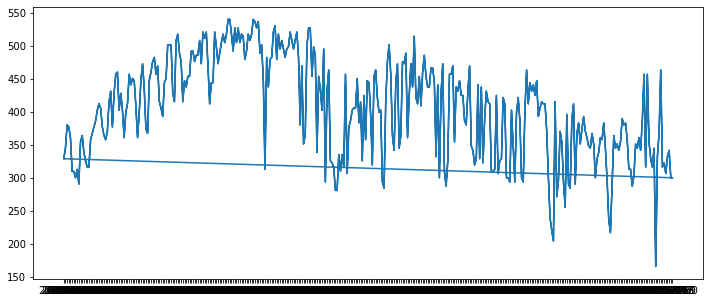

In [ ]:
### gráficar resultados


ref_long = datainit.features.longitude.loc[2]

plotdata = dfdaymet[np.round(dfdaymet.longitude.values.astype(np.float),8) == np.round(ref_long.astype(np.float), 8)]


plt.figure(figsize=[12,5])
plt.plot(plotdata.date, plotdata['srad'].values)
plt.show()

In [ ]:
### exportar datos
dfdaymet.to_csv("daymet_example.csv")

## Extraer datos TRMM nivel diario

In [25]:
## conusltar las imageens disponibles en google earth engine para la misión en específico
datainit = get_geedata.gee_weatherdata("2019-01-01",
                                       "2020-05-30", 
                                       "data/truestationlocation.csv", 
                                       mission = "trmm")
datainit.features

,longitude,latitude,index
0,-78.62869,-5.65875,1
1,-78.69203,-5.64777,2


In [26]:
datainit._bands

['precipitation', 'relativeError', 'satPrecipitationSource']

In [27]:
trmmdata= datainit.summarise_hourlydata(cummulative_bands=['precipitation'])
trmmdata

/content/gee_NOAA/get_geedata.py:437: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  def_variables = np.array(list_var)[var_filter]


sum features processed


,precipitation,date,longitude,latitude
0,0.0,2019-01-01,-78.62869,-5.65875
1,0.0,2019-01-01,-78.69203,-5.64777
2,0.0,2019-01-02,-78.62869,-5.65875
3,0.0,2019-01-02,-78.69203,-5.64777
4,0.0,2019-01-03,-78.62869,-5.65875
...,...,...,...,...
725,0.0,2019-12-29,-78.69203,-5.64777
726,0.0,2019-12-30,-78.62869,-5.65875
727,0.0,2019-12-30,-78.69203,-5.64777
728,0.0,2019-12-31,-78.62869,-5.65875


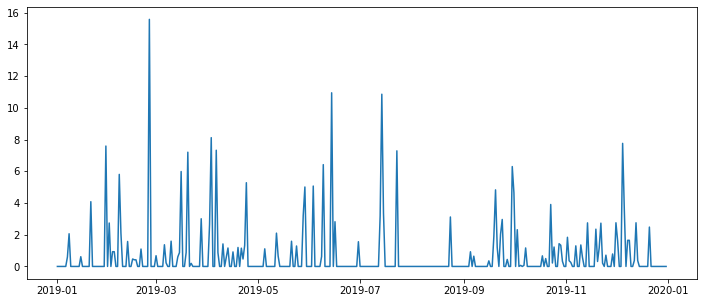

In [29]:
### gráficar resultados

ref_long = datainit.features.longitude.loc[0]

plotdata = trmmdata[np.round(trmmdata.longitude, 3) == np.round(ref_long, 3)]

plt.figure(figsize=[12,5])
plt.plot(plotdata.date, plotdata['precipitation'].values)

plt.show()